# San Francisco Crime Classification

### 1. Data fields
>#### 1.Dates - timestamp of the crime incident
>#### 2.Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
>#### 3.Descript - detailed description of the crime incident (only in train.csv)
>#### 4.DayOfWeek - the day of the week
>#### 5.PdDistrict - name of the Police Department District
>#### 6.Resolution - how the crime incident was resolved (only in train.csv)
>#### 7.Address - the approximate street address of the crime incident 
>#### 8.X - Longitude
>#### 9.Y - Latitude

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Load Dataset

In [2]:
train = pd.read_csv('../data/train.csv', parse_dates=['Dates'])

In [3]:
test = pd.read_csv('../data/test.csv', parse_dates=['Dates'])

In [4]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


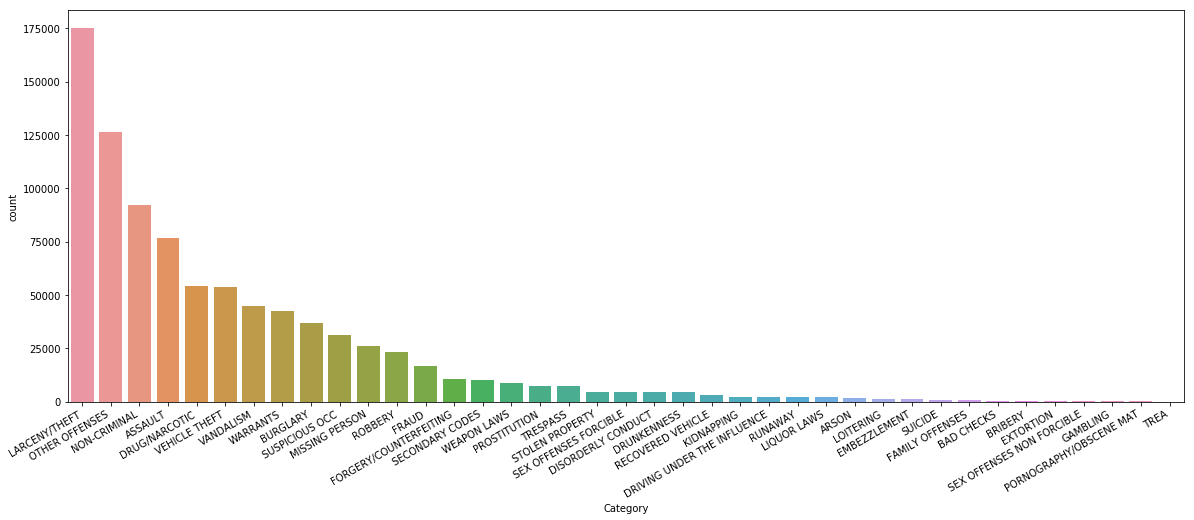

In [6]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,8)
fig.autofmt_xdate()
sns.countplot(train['Category'], order=train['Category'].value_counts().index ,ax=ax1)

### 3. EDA & Feature_Engineering

#### 3-1 Label

In [7]:
label_name ='Category'
Y_train = train [label_name]


print(Y_train.shape)
Y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

#### 3-2 Dates

In [8]:
train['Dates-Year'] = train['Dates'].dt.year
train['Dates-month'] = train['Dates'].dt.month
train['Dates-day'] = train['Dates'].dt.day
train['Dates-hour'] = train['Dates'].dt.hour
train['Dates-minute'] = train['Dates'].dt.minute
train['Dates-second'] = train['Dates'].dt.second
train['Dates-dayofweek'] = train['Dates'].dt.dayofweek

train = train.drop('Dates', axis=1)



In [9]:
test['Dates-Year'] = test['Dates'].dt.year
test['Dates-month'] = test['Dates'].dt.month
test['Dates-day'] = test['Dates'].dt.day
test['Dates-hour'] = test['Dates'].dt.hour
test['Dates-minute'] = test['Dates'].dt.minute
test['Dates-second'] = test['Dates'].dt.second
test['Dates-dayofweek'] = test['Dates'].dt.dayofweek

test = test.drop('Dates', axis=1)


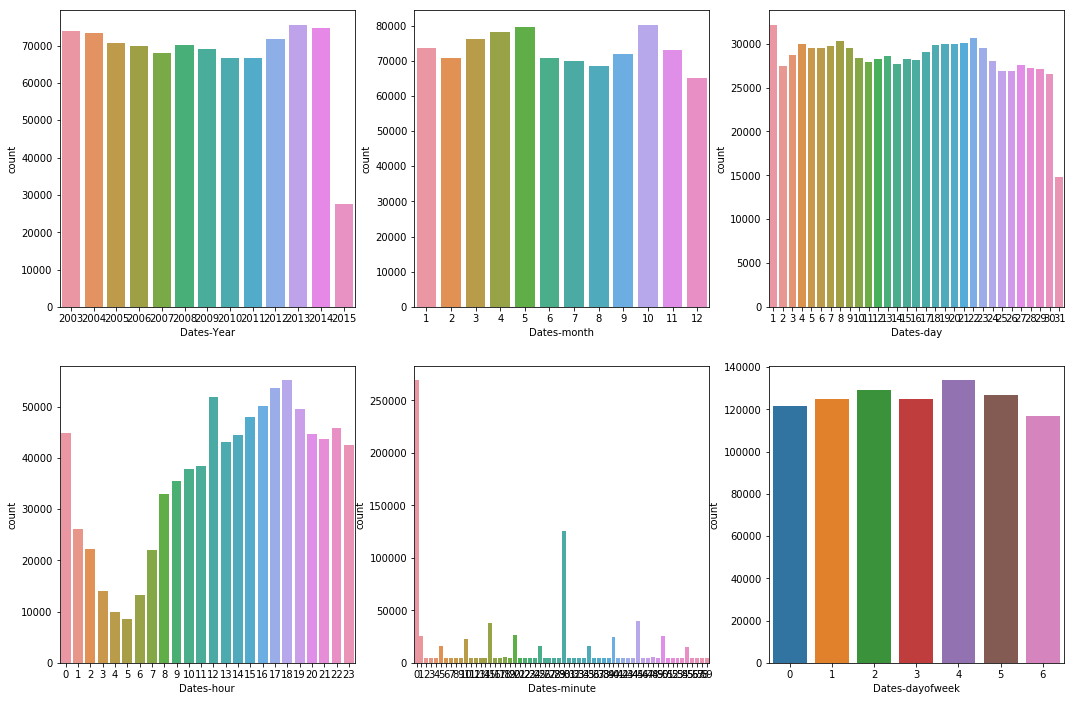

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,12)

sns.countplot(train['Dates-Year'], ax=ax1)
sns.countplot(train['Dates-month'], ax=ax2)
sns.countplot(train['Dates-day'], ax=ax3)
sns.countplot(train['Dates-hour'], ax=ax4)
sns.countplot(train['Dates-minute'], ax=ax5)
sns.countplot(train['Dates-dayofweek'], ax=ax6)

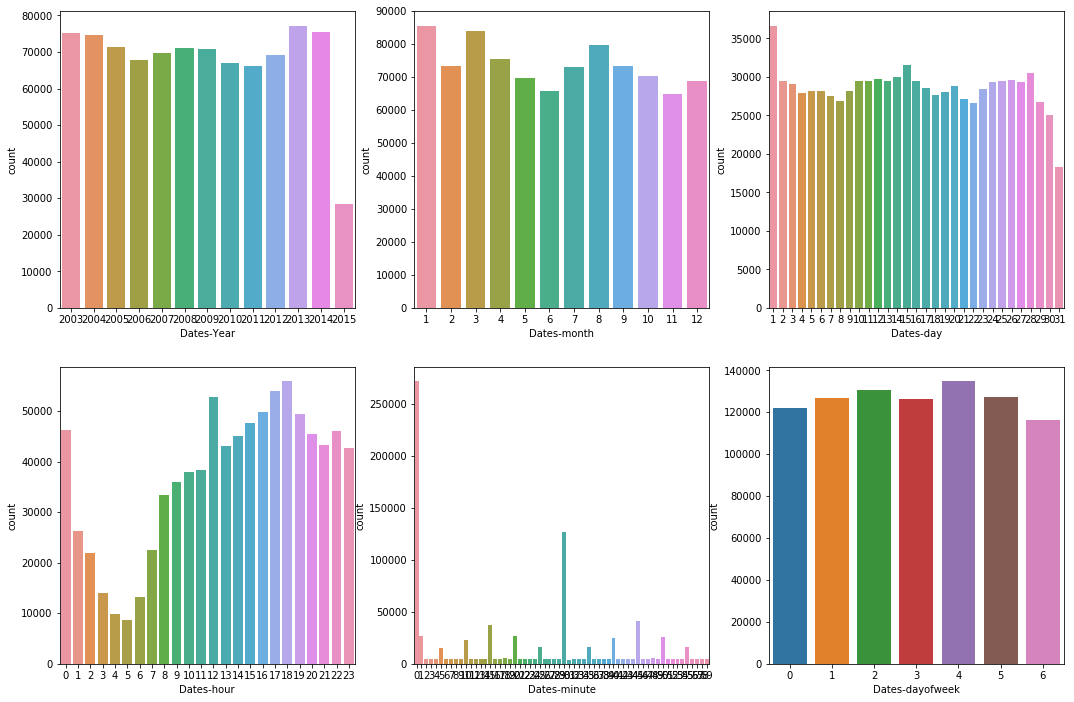

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,12)

sns.countplot(test['Dates-Year'], ax=ax1)
sns.countplot(test['Dates-month'], ax=ax2)
sns.countplot(test['Dates-day'], ax=ax3)
sns.countplot(test['Dates-hour'], ax=ax4)
sns.countplot(test['Dates-minute'], ax=ax5)
sns.countplot(test['Dates-dayofweek'], ax=ax6)

In [12]:
train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-Year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-dayofweek
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,2
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,2
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,2


#### 3-3 X,Y

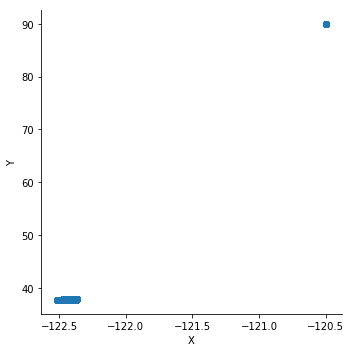

In [13]:
sns.lmplot(data=train, x ='X', y='Y', fit_reg=False)

In [14]:
outlier = train.loc[train['X']>=-121, 'X'] 

In [15]:
outlier_index = outlier.index

In [16]:
train =train.drop(index=outlier_index, axis=0)
Y_train = Y_train.drop(index=outlier_index, axis=0)
print(train.shape)


(877982, 15)


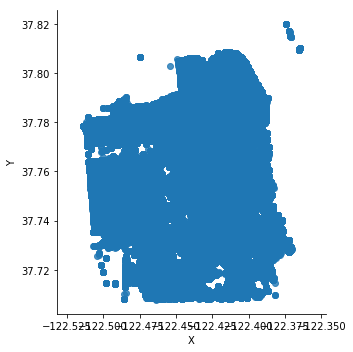

In [17]:
sns.lmplot(data=train, x ='X', y='Y', fit_reg=False)

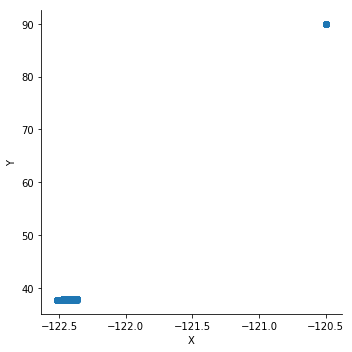

In [18]:
sns.lmplot(data=test, x ='X', y='Y', fit_reg=False)

In [19]:
train.loc[train['Address'].str.contains('/'), 'AddressType'] =1
train.loc[train['Address'].str.contains('of'), 'AddressType'] =0
test.loc[test['Address'].str.contains('/'), 'AddressType'] =1
test.loc[test['Address'].str.contains('of'), 'AddressType'] =0

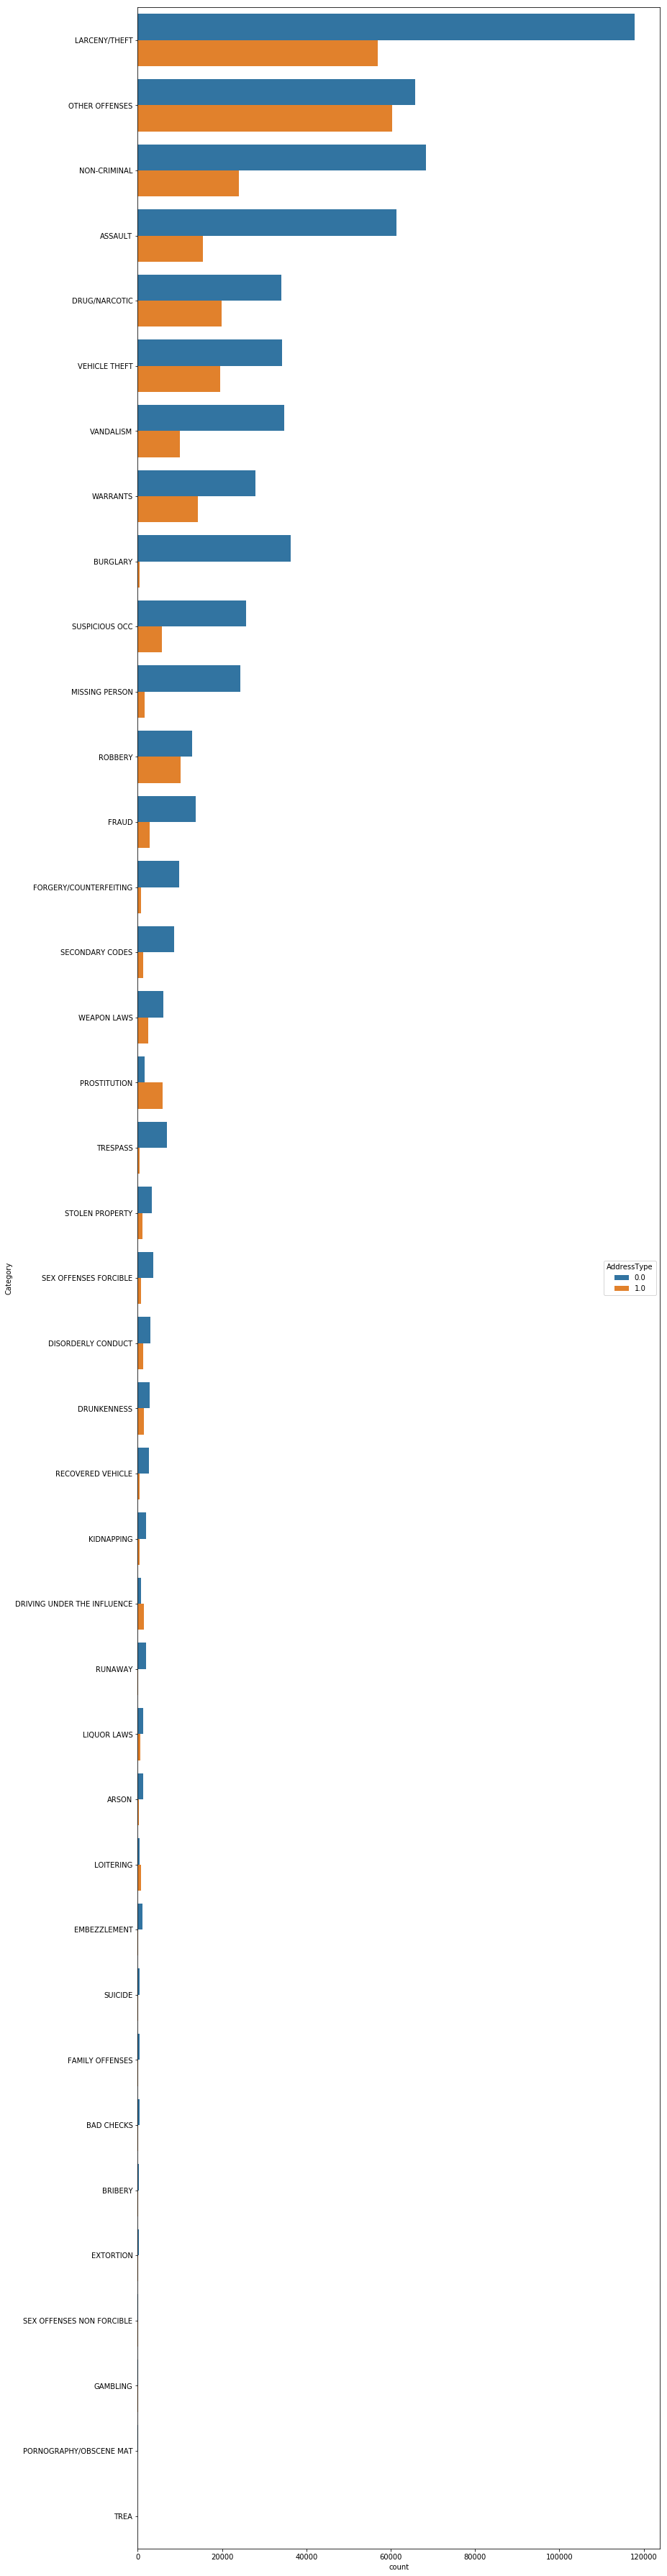

In [20]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(13,65)
sns.countplot(data = train, y='Category', hue='AddressType', order = train['Category'].value_counts().index , ax=ax1)

In [21]:
train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-Year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-dayofweek,AddressType
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2,1.0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2,1.0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,2,1.0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,2,0.0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,2,0.0


In [22]:
test.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,Dates-Year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-dayofweek,AddressType
0,0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,6,0.0
1,1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,6,1.0
2,2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,6,0.0
3,3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,6,0.0
4,4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,6,0.0


In [23]:
 train['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [24]:
 test['PdDistrict'].unique()

array(['BAYVIEW', 'NORTHERN', 'INGLESIDE', 'TARAVAL', 'MISSION',
       'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'SOUTHERN', 'PARK'],
      dtype=object)

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['PdDistrict'])

LabelEncoder()

In [26]:
le.classes_

array(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'], dtype=object)

In [27]:
train['PdDistrict'] = le.transform(train['PdDistrict'])

In [28]:
test['PdDistrict'] = le.transform(test['PdDistrict'])

In [29]:
train['PdDistrict'].head()

0    4
1    4
2    4
3    4
4    5
Name: PdDistrict, dtype: int64

In [30]:
test['PdDistrict'].head()

0    0
1    0
2    4
3    2
4    2
Name: PdDistrict, dtype: int64

In [31]:
train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-Year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-dayofweek,AddressType
0,WARRANTS,WARRANT ARREST,Wednesday,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2,1.0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,4,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,2,1.0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,4,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,2,1.0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,4,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,2,0.0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,5,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,2,0.0


In [32]:
test.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,Dates-Year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-dayofweek,AddressType
0,0,Sunday,0,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,6,0.0
1,1,Sunday,0,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,6,1.0
2,2,Sunday,4,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,6,0.0
3,3,Sunday,2,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,6,0.0
4,4,Sunday,2,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,6,0.0


In [33]:
feature_names= ['PdDistrict','X', 'Y', 'Dates-month' ,'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-dayofweek', 'AddressType']
X_train = train [feature_names]
X_test = test[feature_names]

print(X_train.shape)
X_test.shape

(877982, 9)


(884262, 9)

### 4. Modeling

#### 4-1 LGBM

In [34]:
from lightgbm import LGBMClassifier
model_L = LGBMClassifier(n_estimators = 15, random_state = 45)
model_L

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=15, n_jobs=-1, num_leaves=31, objective=None,
        random_state=45, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### 4-2 RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_R = RandomForestClassifier(random_state= 42, max_depth=16)

model_R

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### 5. Validation & Training

#### 5-1 Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

%time 
score = cross_val_score(model_R, X_train, Y_train, cv=5, scoring = 'neg_log_loss').mean()
score = score * -1
f"Score = {score:.6f}"

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


'Score = 2.541645'

In [56]:
%time model_R.fit(X_train, Y_train)

CPU times: user 21.2 s, sys: 289 ms, total: 21.5 s
Wall time: 24.8 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### 5-2 Hold-Out Validation

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train ,test_size = 0.3, random_state = 42)

In [41]:
X_train.shape

(877982, 9)

In [42]:
x_train.shape, y_train.shape

((614587, 9), (614587,))

In [43]:
x_test.shape, y_test.shape

((263395, 9), (263395,))

#### 5-2-1 Evaluate by Hold-Out Validation

In [44]:
model_R.fit(x_train, y_train)

y_train_predict = model_R.predict(x_train)
y_test_predict = model_R.predict(x_test)

train_accuracy = (y_train_predict == y_train).mean()
test_accuracy = (y_test_predict == y_test).mean()


print(f"train_accuracy: {train_accuracy: .6f}")
print(f"test_accuracy: {test_accuracy: .6f}")


train_accuracy:  0.878222
test_accuracy:  0.281315


In [45]:
accuracy=[]

for i in range(1,30):
    model_R = RandomForestClassifier(random_state=42, max_depth = i)
    model_R.fit(x_train, y_train)
    y_train_predict = model_R.predict(x_train)
    y_test_predict = model_R.predict(x_test)
    
    train_accuracy = (y_train_predict==y_train).mean()
    test_accuracy =(y_test_predict == y_test).mean()
    
    accuracy.append(
        {"accuracy(train)": train_accuracy,
        "accuracy(test)": test_accuracy,
        "max_depth": i})
        
Accuracy=pd.DataFrame(accuracy)

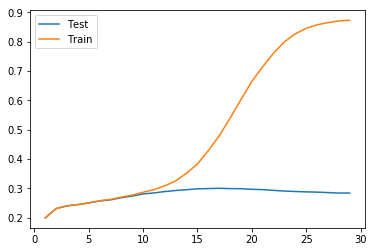

In [46]:
plt.plot(Accuracy['max_depth'], Accuracy['accuracy(test)'], label='Test')
plt.plot(Accuracy['max_depth'], Accuracy['accuracy(train)'], label='Train')

plt.legend()

In [47]:
Accuracy

,accuracy(test),accuracy(train),max_depth
0,0.199290,0.199147,1
1,0.230836,0.231105,2
2,0.240175,0.240449,3
3,0.244336,0.244603,4
4,0.250278,0.250436,5
5,0.256797,0.257752,6
6,0.260647,0.262119,7
7,0.268084,0.269994,8
8,0.273730,0.276906,9
9,0.280719,0.286677,10


### 6. Prediction & Submission

In [ ]:
predictions1 = model_R.predict(X_test)

In [ ]:
print(predictions1.shape)
predictions1

In [57]:
predictions = model_R.predict_proba(X_test)

In [58]:
print(predictions.shape)
predictions[0]

(884262, 39)


array([2.19219762e-03, 9.28975482e-02, 0.00000000e+00, 2.47933884e-03,
       2.74511269e-02, 2.43513400e-03, 2.26492533e-03, 4.03030370e-02,
       5.19536074e-03, 2.04498978e-04, 1.63398693e-04, 6.37038957e-04,
       8.64486945e-03, 1.09551244e-02, 0.00000000e+00, 2.34612346e-03,
       1.03183412e-01, 5.06893207e-04, 0.00000000e+00, 2.57489981e-02,
       1.15982217e-01, 2.16911943e-01, 0.00000000e+00, 4.08997955e-04,
       1.14126313e-02, 2.20677121e-02, 6.29191615e-04, 2.45492755e-02,
       3.29647362e-03, 0.00000000e+00, 8.08948691e-03, 2.80512645e-04,
       4.13073102e-02, 0.00000000e+00, 1.84920142e-02, 7.02157887e-02,
       6.48567883e-02, 4.52958234e-02, 2.85948081e-02])

In [59]:
submit = pd.DataFrame(predictions,
                     index = test.index,
                     columns = model_R.classes_)

submit.index.name = 'Id'
print(submit.shape)
submit.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002192,0.092898,0.000000,0.002479,0.027451,0.002435,0.002265,0.040303,0.005195,0.000204,...,0.0,0.008089,0.000281,0.041307,0.0,0.018492,0.070216,0.064857,0.045296,0.028595
1,0.000922,0.035869,0.000000,0.000000,0.000488,0.000893,0.001767,0.096024,0.000646,0.000000,...,0.0,0.002992,0.000000,0.021086,0.0,0.000000,0.014641,0.016543,0.115640,0.017419
2,0.005210,0.116728,0.000714,0.000000,0.078167,0.003844,0.004418,0.034498,0.005562,0.000000,...,0.0,0.010769,0.000992,0.046161,0.0,0.013805,0.046672,0.058979,0.041310,0.009886
3,0.002829,0.142293,0.000508,0.000252,0.014973,0.004526,0.001810,0.031769,0.004000,0.000000,...,0.0,0.002183,0.000153,0.057251,0.0,0.003741,0.064373,0.128135,0.051837,0.016338
4,0.002829,0.142293,0.000508,0.000252,0.014973,0.004526,0.001810,0.031769,0.004000,0.000000,...,0.0,0.002183,0.000153,0.057251,0.0,0.003741,0.064373,0.128135,0.051837,0.016338


In [60]:
model_R.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [61]:
submit.to_csv('../data/submit/submission_LF(Base_EDA)_CV2.541_181107.csv')